In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('C:/Users/dell/Videos/Fall/Network Analytics/project/drugsComTrain_raw.csv')
df_test = pd.read_csv('C:/Users/dell/Videos/Fall/Network Analytics/project/drugsComTest_raw.csv')

In [3]:
df_train.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17


In [4]:
df= pd.concat([df_train,df_test])
print(df.shape)

(215063, 7)


In [5]:
condition_counts = df['condition'].value_counts()
print(condition_counts)

condition
Birth Control                                   38436
Depression                                      12164
Pain                                             8245
Anxiety                                          7812
Acne                                             7435
                                                ...  
Systemic Candidiasis                                1
Wilson's Disease                                    1
unctional Gastric Disorde                           1
Sepsis                                              1
105</span> users found this comment helpful.        1
Name: count, Length: 916, dtype: int64


In [6]:
# Get unique values and their counts in the 'condition' column
condition_counts = df['condition'].value_counts()

# Filter conditions with counts more than 5000
frequent_conditions = condition_counts[condition_counts > 4000]

# Print the filtered conditions and their counts
print(frequent_conditions)

condition
Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: count, dtype: int64


In [7]:
# Define the conditions to keep
conditions_to_keep = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne','Bipolar Disorde',
                      'Insomnia','Weight Loss','Obesity','ADHD' ]

# Filter the DataFrame to only include the specified conditions
filtered_data = df[df['condition'].isin(conditions_to_keep)]
filtered_data.shape

(98723, 7)

In [8]:
data_first_stage = filtered_data[['drugName', 'condition', 'review', 'rating', 'date','usefulCount']]

# EDA

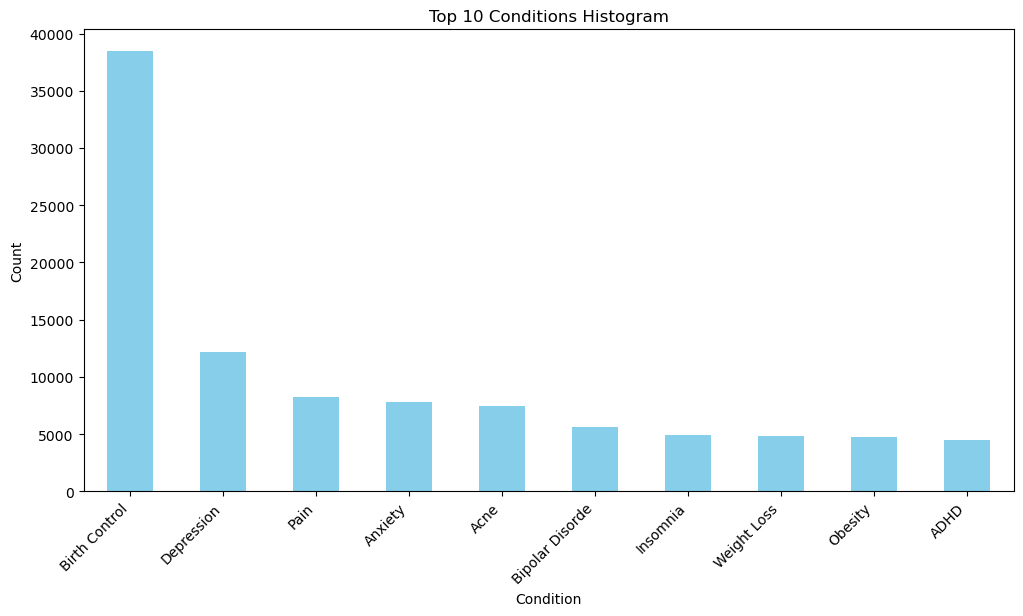

In [11]:
import matplotlib.pyplot as plt

conditions = df['condition']

# Plot histogram
plt.figure(figsize=(12, 6))
conditions.value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Conditions Histogram')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


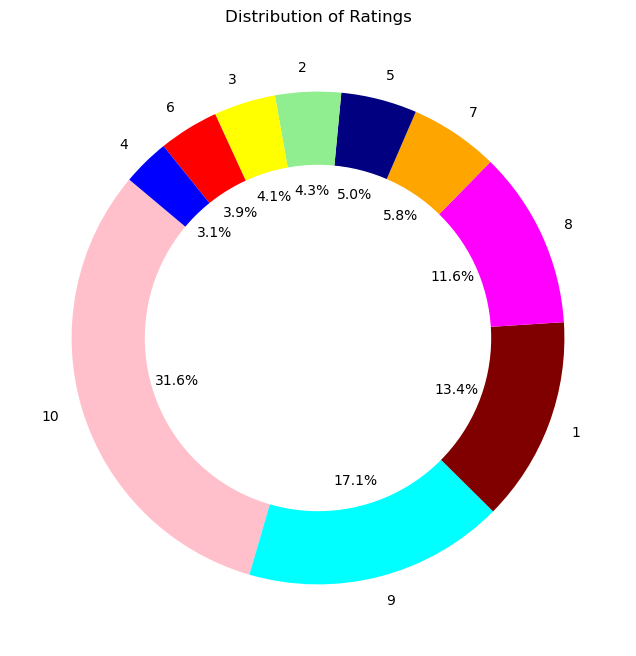

In [12]:
import matplotlib.pyplot as plt

ratings = df['rating']
my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.Circle((0, 0), 4, color = 'white')

# Plot pie chart
plt.figure(figsize=(8, 8))
ratings_counts = ratings.value_counts()
plt.pie(ratings_counts, labels=ratings_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow','red','blue'])
plt.gca().add_artist(my_circle)
plt.title('Distribution of Ratings')
plt.show()


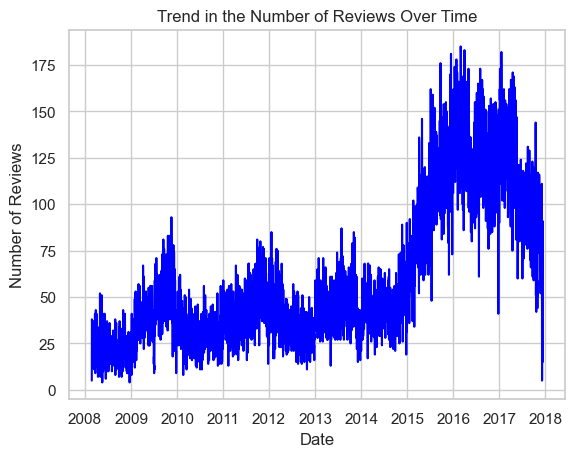

In [15]:
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by date and count the number of reviews for each date
reviews_per_date = df.groupby(df['date'].dt.date).size().reset_index(name='counts')
import matplotlib.pyplot as plt
# Plot a line chart of the trend in the number of reviews over time
plt.plot(reviews_per_date['date'], reviews_per_date['counts'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Trend in the Number of Reviews Over Time')
plt.show()

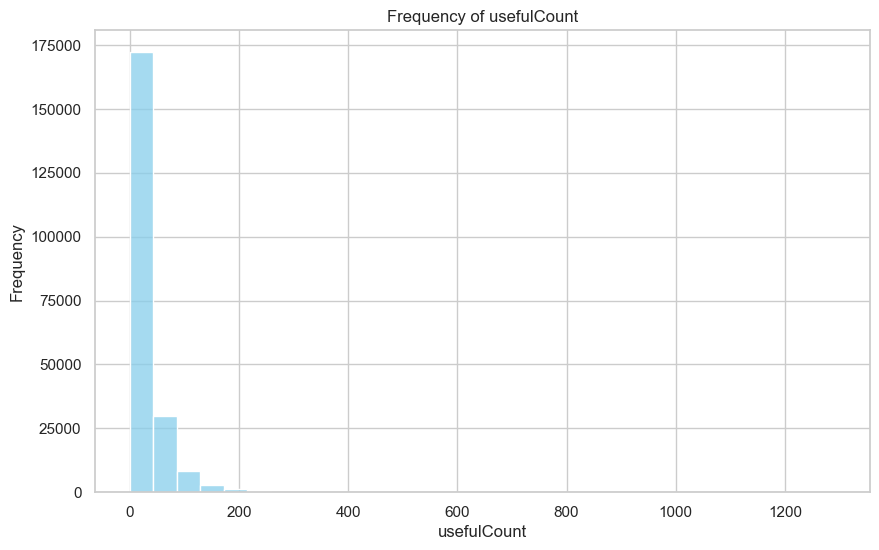

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['usefulCount'], bins=30, kde=False, color='skyblue')

# Set plot labels and title
plt.xlabel('usefulCount')
plt.ylabel('Frequency')
plt.title('Frequency of usefulCount')

# Show the plot
plt.show()


# Review Cleaning

In [18]:
## Cleaning Review
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [20]:
data_first_stage['review_clean'] = review_clean(data_first_stage['review'])
data_first_stage.head(2)

,drugName,condition,review,rating,date,usefulCount,review_clean
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,"""my son is halfway through his fourth week of ..."
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,"""i used to take another oral contraceptive, wh..."


In [21]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data_first_stage['review_clean'] = data_first_stage['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
data_first_stage.head(3)

,drugName,condition,review,rating,date,usefulCount,review_clean
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,"""my son halfway fourth week intuniv. became co..."
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,"""i used take another oral contraceptive, 21 pi..."
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,"""this first time using form birth control. im ..."


# Review WordCloud

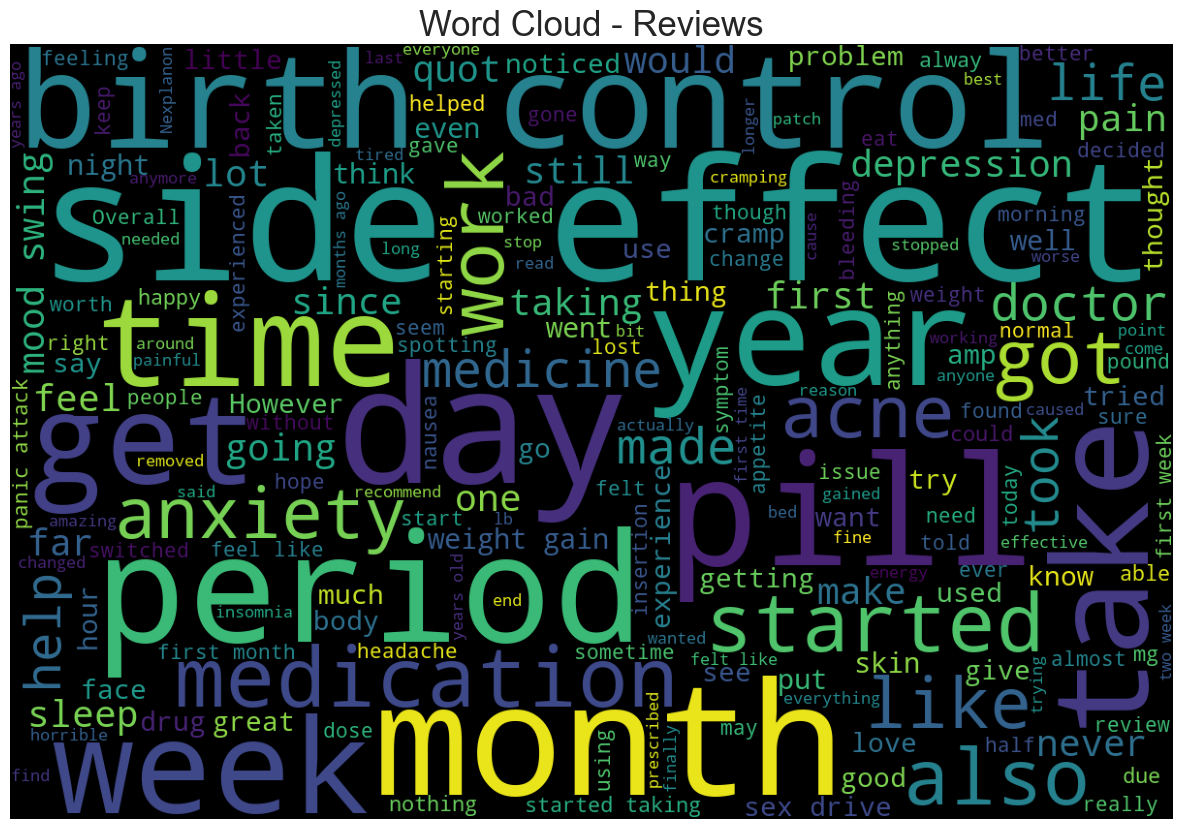

In [22]:
# customize the frequency

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into one string
all_reviews = ' '.join(data_first_stage['review'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color = 'black', stopwords = stop_words, width = 1200, height = 800).generate(all_reviews)
plt.rcParams['figure.figsize'] = (15, 15)

# Display the generated image
plt.title('Word Cloud - Reviews', fontsize = 25)

print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Drug WordCloud

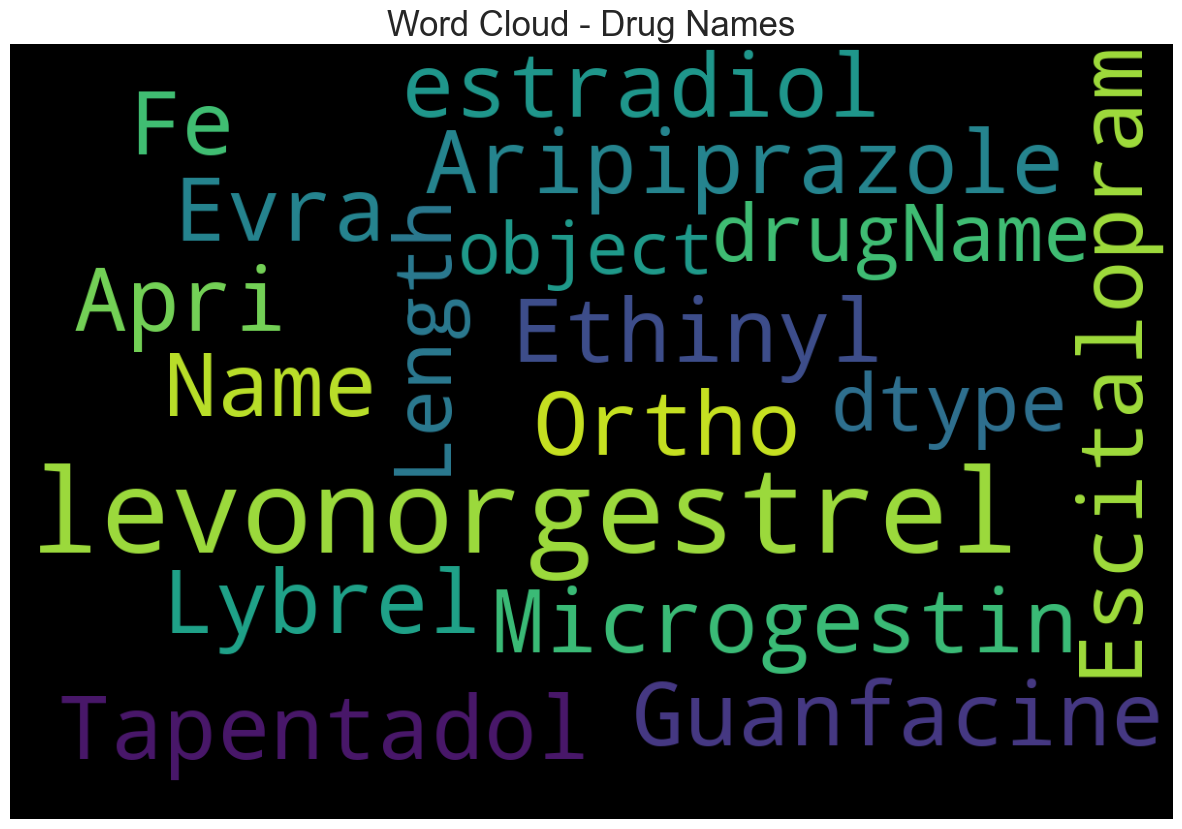

In [23]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'black', stopwords = stop_words, width = 1200, height = 800).generate(str(data_first_stage['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Sentiment Analyis

In [26]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol
data_first_stage['sentiment'] = sentiment(data_first_stage['review'])
data_first_stage['sentiment_clean'] = sentiment(data_first_stage['review_clean'])

In [27]:
data_first_stage.sort_values(by='sentiment_clean', ascending= False).head(2)

,drugName,condition,review,rating,date,usefulCount,review_clean,sentiment,sentiment_clean
119172,Oxycodone,Pain,"""The best in every way.""",10,25-Apr-08,44,"""the best every way.""",1.0,1.0
76424,Venlafaxine,Depression,"""I have taken a lot of depression medicines ov...",9,4-Feb-14,83,"""i taken lot depression medicines years one wo...",0.6,1.0


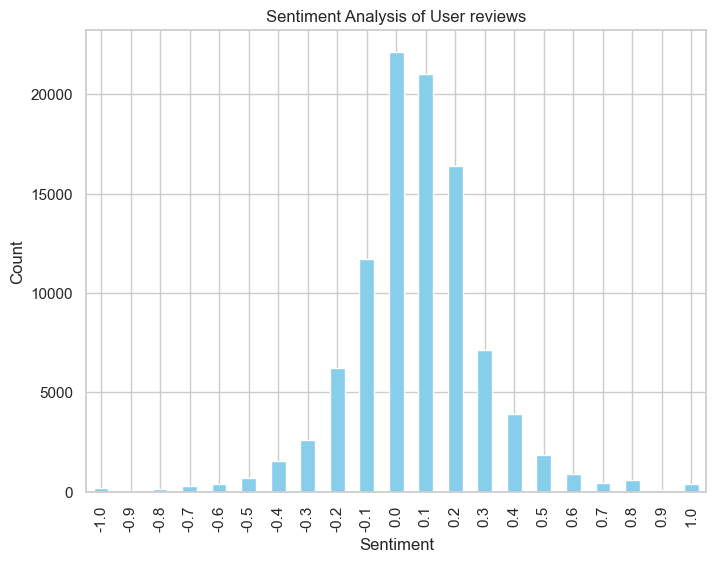

In [28]:
#Plotting sentiment
data_first_stage['rounded_sentiment'] = data_first_stage['sentiment_clean'].round(1)

# Plot histogram
plt.figure(figsize=(8, 6))
data_first_stage['rounded_sentiment'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Sentiment Analysis of User reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Label Encoding of Medical condition(y variable)


In [12]:
data_first_stage["rating"] = data_first_stage["rating"].astype(int)
data_first_stage.head(3)

,drugName,condition,review,rating,date,usefulCount,review_clean
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,"""my son halfway fourth week intuniv. became co..."
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,"""i used take another oral contraceptive, 21 pi..."
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,"""this first time using form birth control. im ..."


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the feature matrix
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
reviews = vectorizer.fit_transform(data_first_stage["review_clean"])

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data_first_stage['condition'])
data_first_stage['condition_label']=labels

In [29]:
data_first_stage.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount',
       'review_clean', 'condition_label'],
      dtype='object')

In [15]:
reviews

<98723x31362 sparse matrix of type '<class 'numpy.float64'>'
	with 3367221 stored elements in Compressed Sparse Row format>

reviews_df = pd.DataFrame(reviews.toarray(), columns=vectorizer.get_feature_names_out())
reviews_df.head(2)

In [16]:
print(vectorizer.get_feature_names_out())

['00' '000' '00001' ... 'zzzquil' 'zzzquill' 'іt']


In [17]:
data_first_stage[['condition','condition_label']].drop_duplicates().sort_values(by='condition_label')

,condition,condition_label
1,ADHD,0
66,Acne,1
60,Anxiety,2
7,Bipolar Disorde,3
2,Birth Control,4
11,Depression,5
21,Insomnia,6
15,Obesity,7
32,Pain,8
178,Weight Loss,9


# Predictive Models  
## Predict Medical Condition from reviews

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [19]:
X_train, X_test, y_train, y_test = train_test_split(reviews, data_first_stage['condition_label'], test_size=0.25, random_state=42)


## Model 1 : LogisticRegression

In [20]:
from sklearn.linear_model import LogisticRegression
# Train the model
model = LogisticRegression(multi_class="ovr")
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)


In [21]:
#print(classification_report(y_test, y_pred))
conf_matrix= confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Act-ADHD', 'Act-Acne','Act-Anxiety', 'Act-Bipolar Disorde','Act-Birth Control', 'Act-Depression','Act-Insomnia', 'Act-Obesity','Act-Pain', 'Act-Weight Loss'])
print("Confusion Matrix:" ,'\n')
print("Predcited:" ,'\n')
print(conf_matrix_df, '\n')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print('Validation accuracy:', accuracy_score(y_test, y_pred))

Confusion Matrix: 

Predcited: 

                       0     1     2     3     4     5     6    7     8    9
Act-ADHD             974     0    32     6    13    64    14    0    17    3
Act-Acne               1  1606     2     2   196    15     1    1     9    0
Act-Anxiety            5     1  1390    27    33   329    56    5    50    4
Act-Bipolar Disorde    8     3    70  1008    36   195    31    6    22    5
Act-Birth Control      1    70     8     2  9462    21     2    5    16    3
Act-Depression        15     0   177    83    66  2626    49    9    43    8
Act-Insomnia           3     0    43    16    19    49  1045    0    28    1
Act-Obesity            4     3     8     6    32    39     7  777    15  332
Act-Pain               1     1    18     5    27    58    20    1  2000    0
Act-Weight Loss        1     0     3     2    41    17     0  279     8  866 

Precision: 0.88
Recall: 0.88
Validation accuracy: 0.8814067501316802


# Model 2 : RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [23]:
#print(classification_report(y_test, y_pred))
conf_matrix= confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Act-ADHD', 'Act-Acne','Act-Anxiety', 'Act-Bipolar Disorde','Act-Birth Control', 'Act-Depression','Act-Insomnia', 'Act-Obesity','Act-Pain', 'Act-Weight Loss'])
print("Confusion Matrix:" ,'\n')
print("Predcited:" ,'\n')
print(conf_matrix_df, '\n')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print('Validation accuracy:', accuracy_score(y_test, y_pred))

Confusion Matrix: 

Predcited: 

                        0     1     2     3     4     5     6    7     8     9
Act-ADHD             1032     2    13     4    15    42     7    0     8     0
Act-Acne                1  1701     5     0   106    14     1    0     5     0
Act-Anxiety             3     2  1558    12    33   200    41    3    48     0
Act-Bipolar Disorde     5     7    24  1157    48   103    17    1    15     7
Act-Birth Control       0    11     0     0  9559     8     1    0     7     4
Act-Depression          8     3    82    41    80  2794    32    5    28     3
Act-Insomnia            3     0    39     8    19    55  1064    1    15     0
Act-Obesity             0     4     5     0    48    14     2  957    13   180
Act-Pain                0     5    11     2    20    44    11    2  2035     1
Act-Weight Loss         1     1     4     0    46    18     1  138     4  1004 

Precision: 0.93
Recall: 0.93
Validation accuracy: 0.9262590656780519


# Model 3 : XgBoost

In [56]:
import xgboost as xgb
# Train the model
model3 = xgb.XGBClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

In [57]:
#print(classification_report(y_test, y_pred))
conf_matrix= confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Act-ADHD', 'Act-Acne','Act-Anxiety', 'Act-Bipolar Disorde','Act-Birth Control', 'Act-Depression','Act-Insomnia', 'Act-Obesity','Act-Pain', 'Act-Weight Loss'])
print("Confusion Matrix:" ,'\n')
print("Predcited:" ,'\n')
print(conf_matrix_df, '\n')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print('Validation accuracy:', accuracy_score(y_test, y_pred))

Confusion Matrix: 

Predcited: 

                       0     1     2     3     4     5     6    7     8    9
Act-ADHD             987     3    24     7     5    68    11    4    10    4
Act-Acne               1  1672     4     2   118    29     0    1     6    0
Act-Anxiety            5     2  1453    20    25   292    48    1    50    4
Act-Bipolar Disorde    7     0    60  1059    17   175    32   10    18    6
Act-Birth Control      0    57    20     0  9428    57     6    4    12    6
Act-Depression        18     1   172    86    44  2638    48    8    46   15
Act-Insomnia           5     2    29    13     9    83  1047    1    13    2
Act-Obesity            6     1     9     1    22    51     5  902     9  217
Act-Pain               0     4    12     8    26    94    14    1  1968    4
Act-Weight Loss        3     0     9     0    17    36     1  199     9  943 

Precision: 0.90
Recall: 0.90
Validation accuracy: 0.8953040800615858


In [91]:
model3.feature_importances_

array([0.00025952, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

## Model 4(Random Forest ) has high accuray than other 2 models, so taking feature importance from model2 to reduce features and reduce run-time
## Taking Feature importance threshold - 0.0001

In [27]:
# Feature importance
feature_importance = model2.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head(5000)
# # Display the top N features
# top_n_features = 10  # You can adjust this based on your preference
# print(f'Top {top_n_features} Features:')
# print(feature_importance_df.head(top_n_features))

# Optional: Remove less important columns
threshold_importance = 0.0001
  # You can adjust this threshold based on your preference
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold_importance]['Feature']
selected_features

20470        pain
21002      period
3695      anxiety
2646         acne
5070        birth
           ...   
16170       knees
7241     comments
27123      supply
26756    stressed
224          1200
Name: Feature, Length: 1245, dtype: object

In [28]:
# Find the indices of selected features in the original feature set
selected_feature_indices = np.where(np.isin(vectorizer.get_feature_names_out(), selected_features))[0]

# Display the indices
print("Indices of Selected Features:")
print(selected_feature_indices)


Indices of Selected Features:
[    0    51    52 ... 31305 31308 31353]


In [29]:
selected_feature_indices.size

1245

In [30]:
from scipy.sparse import csr_matrix

# Ensure 'reviews' is a CSR (Compressed Sparse Row) matrix for efficient column slicing
reviews_csr = csr_matrix(reviews)

# Select columns based on indices
selected_columns_sparse = reviews_csr[:, selected_feature_indices]
selected_columns_sparse
# Now 'selected_columns_sparse' contains the columns corresponding to the selected features


<98723x1245 sparse matrix of type '<class 'numpy.float64'>'
	with 2682407 stored elements in Compressed Sparse Row format>

In [31]:
X_train, X_test, y_train, y_test = train_test_split(selected_columns_sparse, data_first_stage['condition_label'], test_size=0.25, random_state=42)


In [32]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier()
model4.fit(X_train, y_train)


RandomForestClassifier()

In [34]:
y_pred = model4.predict(X_test)
#print(classification_report(y_test, y_pred))
conf_matrix= confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Act-ADHD', 'Act-Acne','Act-Anxiety', 'Act-Bipolar Disorde','Act-Birth Control', 'Act-Depression','Act-Insomnia', 'Act-Obesity','Act-Pain', 'Act-Weight Loss'])
print("Confusion Matrix:" ,'\n')
print("Predcited:" ,'\n')
print(conf_matrix_df, '\n')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print('Validation accuracy:', accuracy_score(y_test, y_pred))

Confusion Matrix: 

Predcited: 

                        0     1     2     3     4     5     6    7     8     9
Act-ADHD             1041     2    14     4    13    24    11    2    12     0
Act-Acne                2  1705     6     2    96    14     0    1     6     1
Act-Anxiety             9     2  1578    14    26   182    39    3    45     2
Act-Bipolar Disorde     8     2    33  1164    30    89    22    9    25     2
Act-Birth Control       0    22     9     4  9527     8     4    2    10     4
Act-Depression         12     2    90    54    41  2788    37   10    34     8
Act-Insomnia            8     1    37    13    18    53  1053    0    21     0
Act-Obesity             0     5     5     1    38    21     4  967     8   174
Act-Pain                2     7    17     7    28    53    16    3  1997     1
Act-Weight Loss         2     0     6     0    35    18     3  133     5  1015 

Precision: 0.92
Recall: 0.93
Validation accuracy: 0.9252056237591669


In [36]:

# Get the column names from the selected indices
selected_column_names = vectorizer.get_feature_names_out()[selected_feature_indices]
selected_column_names

array(['00', '10', '100', ..., 'zolpidem', 'zombie', 'zyprexa'],
      dtype=object)

In [37]:
selected_feature_indices

array([    0,    51,    52, ..., 31305, 31308, 31353], dtype=int64)

In [41]:
# Feature importance
feature_importance = model4.feature_importances_
feature_names = selected_column_names

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head()


,Feature,Importance
809,pain,0.038035
827,period,0.030215
161,birth,0.025974
70,acne,0.023011
110,anxiety,0.022777


## Model 5 (Random Forest) with different threshold as 0.001

In [42]:
# Feature importance
feature_importance = model2.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.head(5000)
# # Display the top N features
# top_n_features = 10  # You can adjust this based on your preference
# print(f'Top {top_n_features} Features:')
# print(feature_importance_df.head(top_n_features))

# Optional: Remove less important columns
threshold_importance = 0.001
  # You can adjust this threshold based on your preference
selected_features1 = feature_importance_df[feature_importance_df['Importance'] >= threshold_importance]['Feature']
selected_features1

20470           pain
21002         period
3695         anxiety
2646            acne
5070           birth
            ...     
29986        vicodin
11470    experienced
27961          thing
25913            son
27492          taken
Name: Feature, Length: 197, dtype: object

In [43]:
# Find the indices of selected features in the original feature set
selected_feature_indices1 = np.where(np.isin(vectorizer.get_feature_names_out(), selected_features1))[0]

# Display the indices
print("Indices of Selected Features:")
print(selected_feature_indices1)
print(selected_feature_indices1.size)

Indices of Selected Features:
[   51  2591  2646  2739  2742  2795  2806  3023  3351  3695  3796  4033
  4178  4344  4455  4638  4829  4933  4949  5058  5070  5167  5326  5564
  5868  6305  6641  6818  6823  7425  7718  7733  8041  8044  8406  8421
  8531  8545  8917  8924  8982  9208  9289  9306  9633  9843  9907  9946
 10131 10176 10195 10397 10402 10482 10493 10507 10697 10823 10950 11371
 11469 11470 11634 11733 11849 11851 11868 12336 12373 12790 12792 12990
 13146 13164 13196 13315 13732 13776 13867 13906 13908 13924 14218 14234
 14292 14704 14808 14810 15255 15258 15286 15749 15756 16326 16428 16478
 16637 16685 16721 16730 16749 16833 16875 16896 17092 17102 17106 17111
 17131 17217 17416 17693 17716 17980 18213 18509 18518 18525 18535 18557
 18626 18948 19208 19258 19271 19615 19876 20470 20475 20559 20956 21002
 21006 21211 21353 21362 21369 21815 21968 21970 22019 22162 22239 22444
 23042 23193 23500 23584 23851 24104 24558 24657 24977 25043 25054 25479
 25549 25561 25913 26

In [45]:
from scipy.sparse import csr_matrix

# Assuming 'reviews' is your sparse matrix and 'selected_feature_indices' is the indices of selected features

# Ensure 'reviews' is a CSR (Compressed Sparse Row) matrix for efficient column slicing
reviews_csr = csr_matrix(reviews)

# Select columns based on indices
selected_columns_sparse1 = reviews_csr[:, selected_feature_indices1]
selected_columns_sparse1
# Now 'selected_columns_sparse' contains the columns corresponding to the selected features


<98723x197 sparse matrix of type '<class 'numpy.float64'>'
	with 1384753 stored elements in Compressed Sparse Row format>

In [47]:
X_train, X_test, y_train, y_test = train_test_split(selected_columns_sparse1, data_first_stage['condition_label'], test_size=0.25, random_state=42)
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier()
model5.fit(X_train, y_train)


RandomForestClassifier()

In [48]:
y_pred = model5.predict(X_test)
#print(classification_report(y_test, y_pred))
conf_matrix= confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Act-ADHD', 'Act-Acne','Act-Anxiety', 'Act-Bipolar Disorde','Act-Birth Control', 'Act-Depression','Act-Insomnia', 'Act-Obesity','Act-Pain', 'Act-Weight Loss'])
print("Confusion Matrix:" ,'\n')
print("Predcited:" ,'\n')
print(conf_matrix_df, '\n')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print('Validation accuracy:', accuracy_score(y_test, y_pred))

Confusion Matrix: 

Predcited: 

                        0     1     2     3     4     5     6    7     8    9
Act-ADHD             1018     2    23     7    10    31    12    1    16    3
Act-Acne                1  1689    12     4    96    13     2    2    14    0
Act-Anxiety             9     2  1586    17    31   158    35    2    59    1
Act-Bipolar Disorde     8     0    47  1141    36    94    18    8    27    5
Act-Birth Control       2    25    21     2  9488    18     7    4    17    6
Act-Depression         11     3   116    65    43  2727    47   18    38    8
Act-Insomnia           15     0    45    11    22    59  1029    1    22    0
Act-Obesity             1     3    11     3    31    16     3  961    11  183
Act-Pain                3     7    41    16    31    56    20    6  1948    3
Act-Weight Loss         3     0     9     3    36    20     4  137     7  998 

Precision: 0.91
Recall: 0.92
Validation accuracy: 0.9150763745391192


## Model 6 with PCA (Dimensionality Reduction)

In [50]:
selected_features.size

1245

In [51]:
reviews_df = pd.DataFrame(reviews.toarray(), columns=vectorizer.get_feature_names_out())
reviews_df.head(2)

,00,000,00001,0001,0007,000mg,000s,001,0010782485900484,002,...,zypexa,zyprexa,zyprexia,zypreza,zyrtec,zzquill,zzz,zzzquil,zzzquill,іt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.decomposition import PCA
n_components=200
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(reviews_df[selected_features])
# Create a DataFrame with the PCA results
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=pca_result, columns=pca_columns)

# Display the resulting DataFrame
print(pca_df.head(3))

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.042364 -0.008106 -0.012164 -0.031890 -0.050671  0.048489  0.013797   
1  0.115446  0.029351 -0.048678 -0.019187 -0.108659  0.017086  0.006246   
2  0.229700  0.075604 -0.006746  0.108167  0.035279  0.052378  0.050506   

        PC8       PC9      PC10  ...     PC191     PC192     PC193     PC194  \
0  0.023778  0.054676  0.013016  ...  0.004861 -0.042758 -0.003107 -0.002278   
1  0.119636  0.031578  0.048519  ...  0.058500 -0.003771 -0.055259  0.005863   
2 -0.044510  0.171355  0.049006  ...  0.002588  0.000805 -0.040881  0.003777   

      PC195     PC196     PC197     PC198     PC199     PC200  
0  0.023851 -0.009731 -0.002625 -0.049249  0.046439  0.030851  
1  0.035723 -0.015858 -0.022192 -0.016188  0.003545 -0.002549  
2  0.011618 -0.024655  0.006859  0.008584 -0.008831 -0.016352  

[3 rows x 200 columns]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, data_first_stage['condition_label'], test_size=0.25, random_state=42)
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier()
model6.fit(X_train, y_train)


RandomForestClassifier()

In [55]:
y_pred = model6.predict(X_test)
#print(classification_report(y_test, y_pred))
conf_matrix= confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Act-ADHD', 'Act-Acne','Act-Anxiety', 'Act-Bipolar Disorde','Act-Birth Control', 'Act-Depression','Act-Insomnia', 'Act-Obesity','Act-Pain', 'Act-Weight Loss'])
print("Confusion Matrix:" ,'\n')
print("Predcited:" ,'\n')
print(conf_matrix_df, '\n')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print('Validation accuracy:', accuracy_score(y_test, y_pred))

Confusion Matrix: 

Predcited: 

                       0     1     2     3     4     5     6    7     8    9
Act-ADHD             959     1    22     3    12    96    15    0    13    2
Act-Acne               0  1699     7     4   101    15     0    1     6    0
Act-Anxiety            4     1  1550     8    24   229    36    1    47    0
Act-Bipolar Disorde    2     2    31  1061    24   195    30    7    28    4
Act-Birth Control      0    25     7     4  9513    22     3    1     8    7
Act-Depression         2     0    85    26    50  2818    47    8    34    6
Act-Insomnia           1     0    25     4    16    79  1057    3    18    1
Act-Obesity            1     2     4     1    35    31     5  931    14  199
Act-Pain               3     4    20     8    32    77     8    3  1976    0
Act-Weight Loss        3     0     2     4    53    28     2  145     5  975 

Precision: 0.92
Recall: 0.91
Validation accuracy: 0.9132125926826303


In [79]:
from sklearn.decomposition import PCA
n_components=100
pca1 = PCA(n_components=n_components)
pca_result1 = pca1.fit_transform(reviews_df[selected_features])
# Create a DataFrame with the PCA results
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df1 = pd.DataFrame(data=pca_result1, columns=pca_columns)

# Display the resulting DataFrame
print(pca_df1.head(3))

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.042364 -0.008111 -0.012168 -0.031896 -0.050655  0.048464  0.013859   
1  0.115446  0.029365 -0.048679 -0.019206 -0.108638  0.017121  0.006203   
2  0.229701  0.075600 -0.006752  0.108179  0.035294  0.052408  0.050538   

        PC8       PC9      PC10  ...      PC91      PC92      PC93      PC94  \
0  0.023766  0.054675  0.012973  ...  0.038901  0.048637 -0.061834  0.017230   
1  0.119626  0.031690  0.048559  ...  0.025249  0.019209  0.023824 -0.003251   
2 -0.044532  0.171288  0.048964  ... -0.019719  0.006663 -0.069083  0.002801   

       PC95      PC96      PC97      PC98      PC99     PC100  
0 -0.002907 -0.020895 -0.020283 -0.002184  0.048204  0.024810  
1 -0.029132  0.001643  0.013109 -0.055189 -0.011951  0.003609  
2 -0.039850 -0.014064  0.037715  0.035835  0.001505 -0.031116  

[3 rows x 100 columns]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(pca_df1, data_first_stage['condition_label'], test_size=0.25, random_state=42)
from sklearn.ensemble import RandomForestClassifier

model7 = RandomForestClassifier()
model7.fit(X_train, y_train)


RandomForestClassifier()

In [62]:
y_pred = model7.predict(X_test)
#print(classification_report(y_test, y_pred))
conf_matrix= confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Act-ADHD', 'Act-Acne','Act-Anxiety', 'Act-Bipolar Disorde','Act-Birth Control', 'Act-Depression','Act-Insomnia', 'Act-Obesity','Act-Pain', 'Act-Weight Loss'])
print("Confusion Matrix:" ,'\n')
print("Predcited:" ,'\n')
print(conf_matrix_df, '\n')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print('Validation accuracy:', accuracy_score(y_test, y_pred))

Confusion Matrix: 

Predcited: 

                       0     1     2     3     4     5     6    7     8    9
Act-ADHD             964     1    21     4    16    87    15    2    13    0
Act-Acne               1  1698     9     1   104    12     0    1     6    1
Act-Anxiety            5     0  1547    11    18   230    38    0    49    2
Act-Bipolar Disorde    9     0    32  1064    24   189    26    3    29    8
Act-Birth Control      0    25     7     4  9517    20     2    0     9    6
Act-Depression         4     0    92    26    42  2824    43    5    31    9
Act-Insomnia           3     0    24     8    17    72  1062    0    14    4
Act-Obesity            3     1     2     5    39    29     5  919    13  207
Act-Pain               4     4    22    10    24    73    12    2  1979    1
Act-Weight Loss        7     0     1     3    56    30     2  170     6  942 

Precision: 0.91
Recall: 0.91
Validation accuracy: 0.9122807017543859


# Topic modeling

In [35]:
# !python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 495.5 kB/s eta 0:00:26
     --------------------------------------- 0.0/12.8 MB 495.5 kB/s eta 0:00:26
     --------------------------------------- 0.1/12.8 MB 656.4 kB/s eta 0:00:20
      --------------------------------------- 0.3/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.4/12.8 MB 1.6 MB/s eta 0:00:08
     - -------------------------------------- 0.4/12.8 MB 1.4 MB/s eta 0:00:09
     -- ------------------------------------- 0.8/12.8 MB 2.5 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 3.3 MB/s eta 0:00:04
     --- ------------------------------------ 1.2/12.8 MB 3.2 MB/s eta 0:00:04
     ----- ---------------------------------- 1.6/12.8 MB 3.5 MB/s eta 0:00:04
     ----- ---------------------------------- 1.9/12.8 MB 3.8 M

In [41]:
import spacy
from gensim import corpora, models
import pandas as pd

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Tokenization and Preprocessing
def tokenize(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# Apply tokenization to the 'review' column in the filtered data
filtered_data['tokenized_review'] = filtered_data['review'].apply(tokenize)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(filtered_data['tokenized_review'])

# Convert the tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in filtered_data['tokenized_review']]

# Apply the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15, random_state=42)

# Assign the dominant topic to each document
filtered_data['dominant_topic'] = filtered_data['tokenized_review'].apply(lambda x: max(lda_model[dictionary.doc2bow(x)], key=lambda x: x[1])[0])

# Print the topics and associated words
topics = lda_model.print_topics(num_words=20)
for topic in topics:
    print(topic)


(0, '0.041*"acne" + 0.037*"skin" + 0.022*"clear" + 0.020*"face" + 0.020*"month" + 0.014*"week" + 0.013*"bad" + 0.013*"start" + 0.012*"work" + 0.011*"go" + 0.011*"year" + 0.010*"get" + 0.010*"day" + 0.010*"try" + 0.009*"dry" + 0.009*"patch" + 0.008*"take" + 0.008*"use" + 0.007*"pimple" + 0.007*"break"')
(1, '0.035*"pain" + 0.025*"sleep" + 0.023*"take" + 0.019*"work" + 0.019*"mg" + 0.019*"day" + 0.015*"night" + 0.015*"hour" + 0.010*"year" + 0.010*"time" + 0.010*"help" + 0.009*"doctor" + 0.009*"wake" + 0.008*"effect" + 0.007*"try" + 0.007*"medication" + 0.007*"feel" + 0.007*"give" + 0.007*"medicine" + 0.007*"like"')
(2, '0.026*"feel" + 0.021*"anxiety" + 0.020*"take" + 0.019*"mg" + 0.016*"depression" + 0.015*"year" + 0.015*"effect" + 0.013*"day" + 0.013*"life" + 0.013*"start" + 0.013*"work" + 0.011*"like" + 0.011*"medication" + 0.011*"week" + 0.011*"help" + 0.010*"month" + 0.009*"time" + 0.009*"try" + 0.009*"go" + 0.008*"medicine"')
(3, '0.032*"weight" + 0.029*"lose" + 0.024*"day" + 0.023*

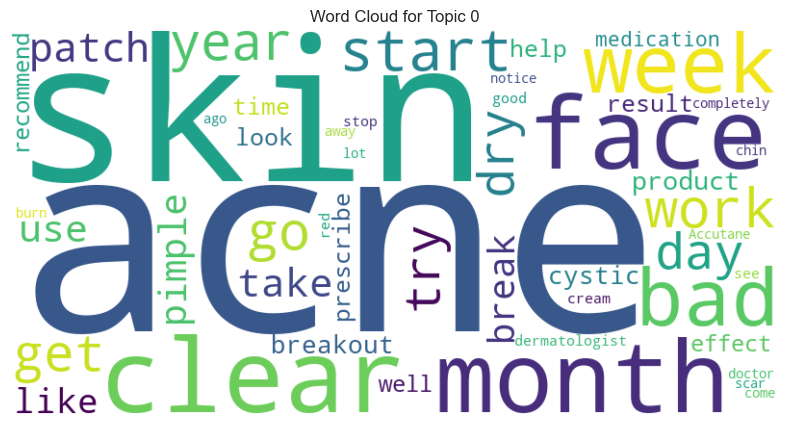

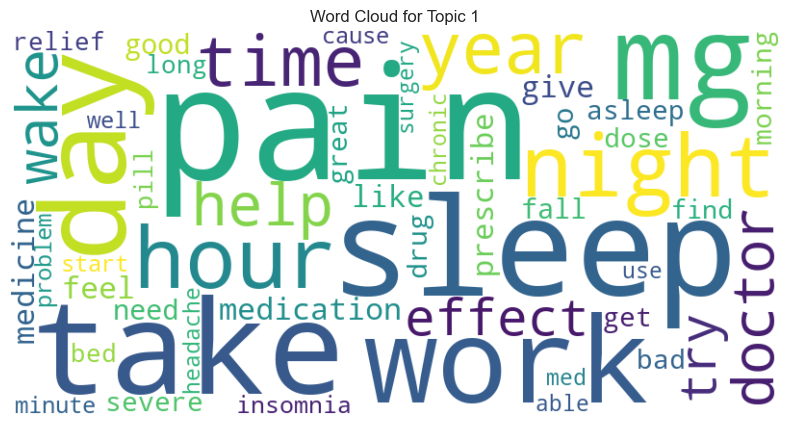

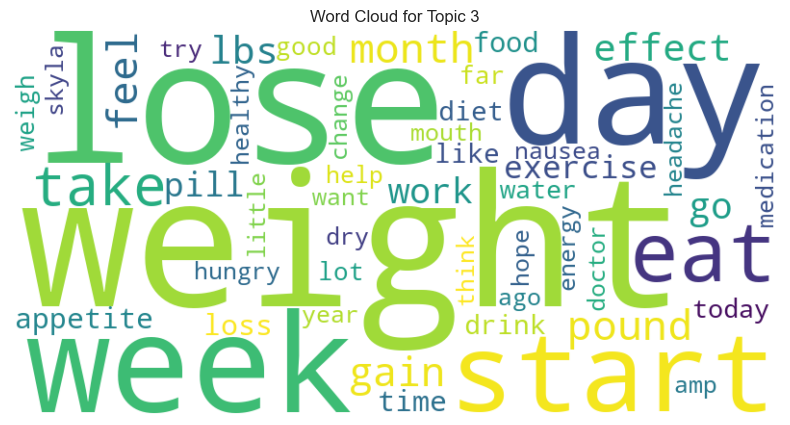

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word clouds for specified topics
def generate_word_cloud(topic_id, lda_model, dictionary, title):
    # Get the words and their probabilities for the specified topic
    words_probs = lda_model.show_topic(topic_id, topn=50)
    
    # Create a dictionary from words and their probabilities
    wordcloud_dict = {word: prob for word, prob in words_probs}
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for specified topics
generate_word_cloud(0, lda_model, dictionary, 'Word Cloud for Topic 0')
generate_word_cloud(1, lda_model, dictionary, 'Word Cloud for Topic 1')
generate_word_cloud(3, lda_model, dictionary, 'Word Cloud for Topic 3')


# Network of medical condition - drug

## Various network plots

In [ ]:
#!pip install rake_nltk

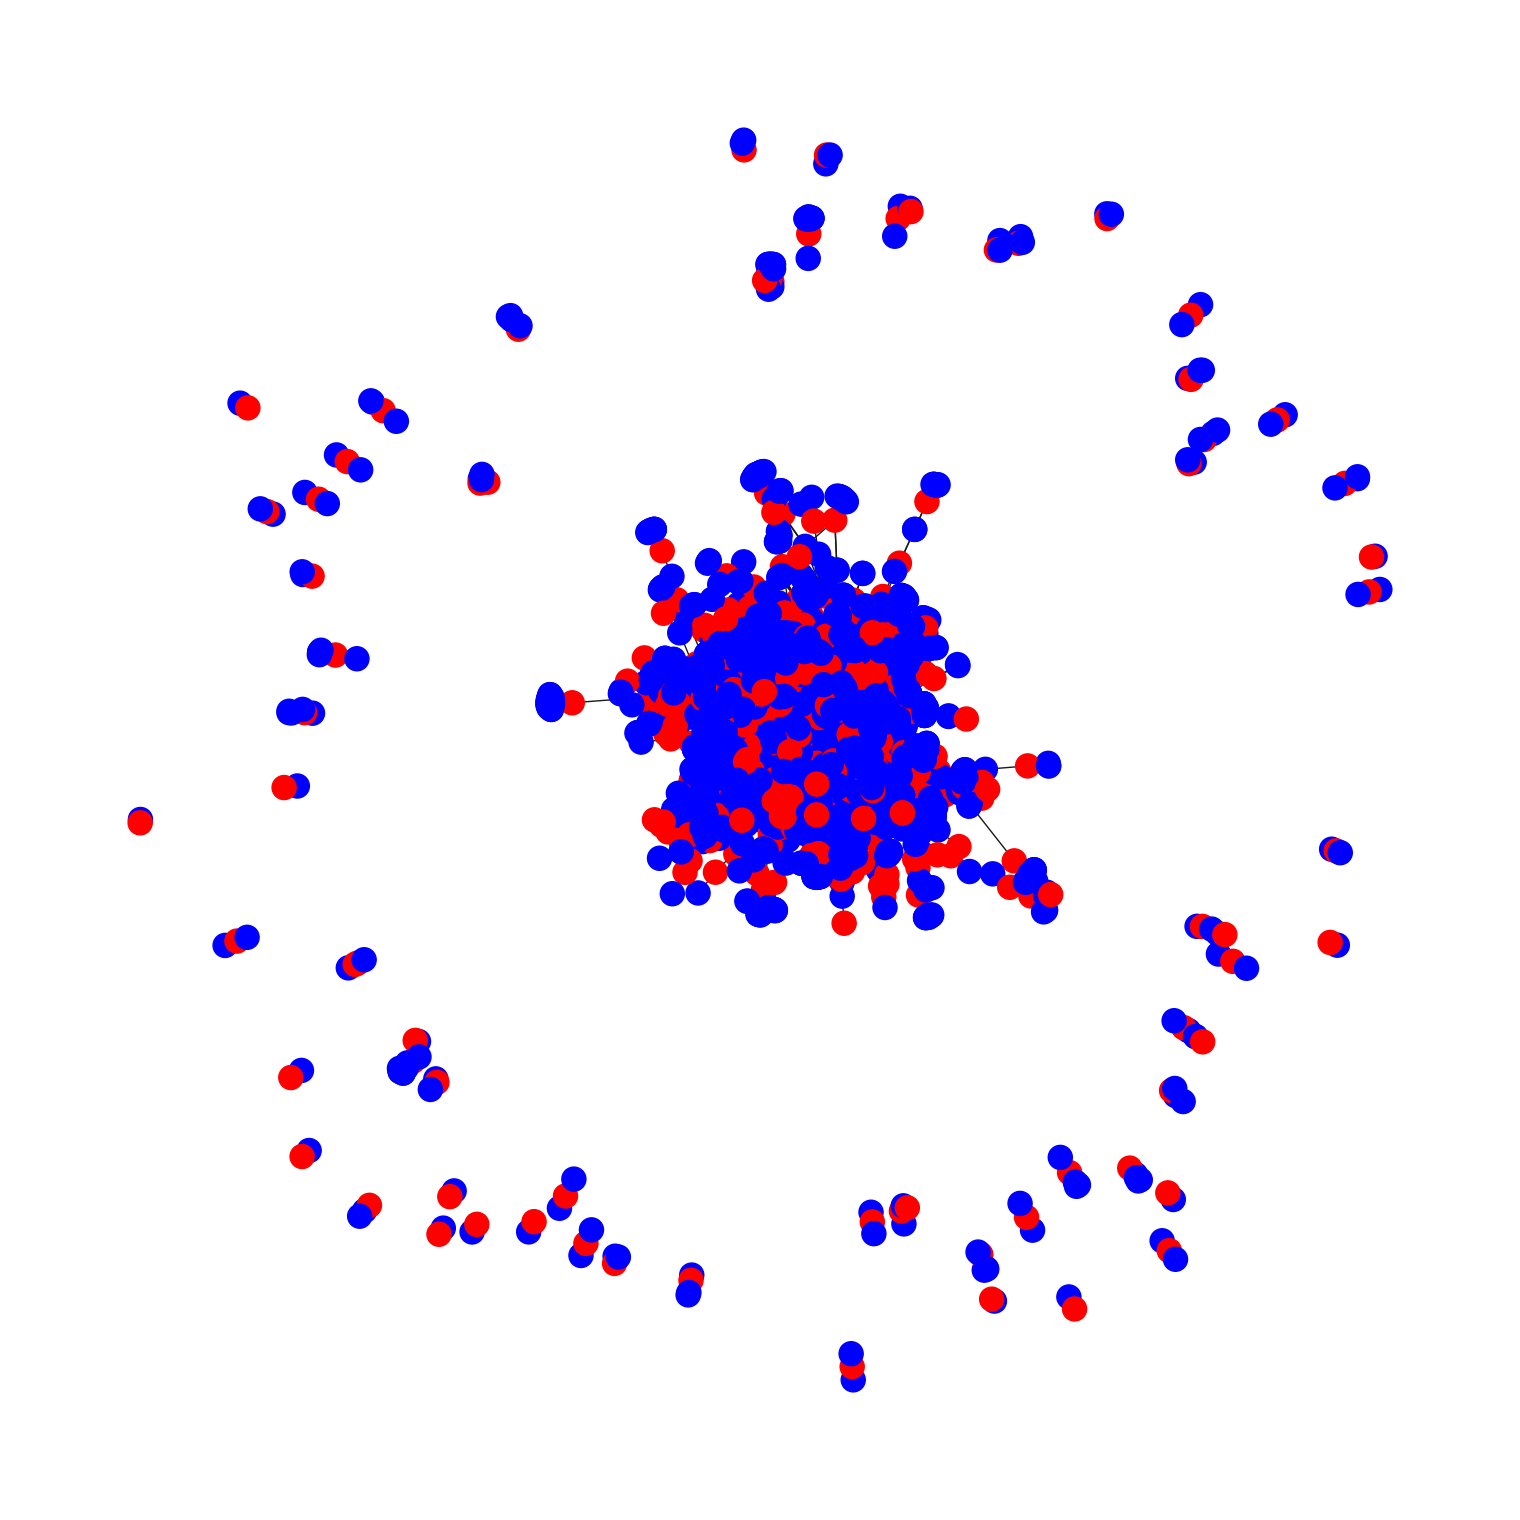

In [38]:
import networkx as nx

# Create a drug-condition network graph
G = nx.Graph()

# Add nodes and edges
for _, row in df.iterrows():
    G.add_node(row['drugName'], type='drug')
    G.add_node(row['condition'], type='condition')
    G.add_edge(row['drugName'], row['condition'])

# Draw the network graph
pos = nx.spring_layout(G)  # You can use other layout algorithms
node_colors = ['blue' if node_type == 'drug' else 'red' for node_type in nx.get_node_attributes(G, 'type').values()]

nx.draw(G, pos, node_color=node_colors, with_labels=False, font_size=8)
plt.show()


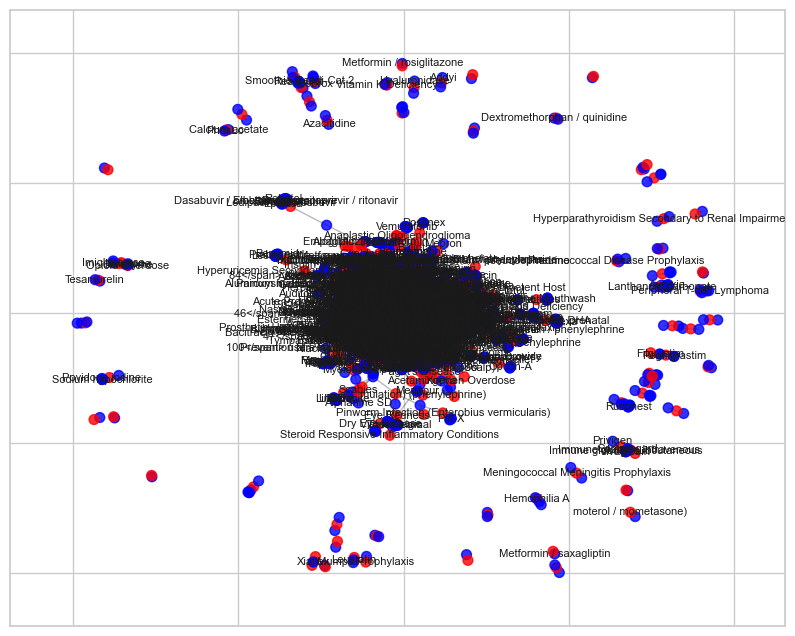

In [39]:
# Create a drug-condition network graph
G = nx.Graph()

# Add nodes and edges
for _, row in df.iterrows():
    G.add_node(row['drugName'], type='drug')
    G.add_node(row['condition'], type='condition')
    G.add_edge(row['drugName'], row['condition'])

# Draw the network graph
pos = nx.spring_layout(G, seed=42)  # Specifying a seed for reproducibility
node_colors = ['blue' if node_type == 'drug' else 'red' for node_type in nx.get_node_attributes(G, 'type').values()]

# Adjust the size of the figure
plt.figure(figsize=(10, 8))

# Draw nodes and edges separately for better customization
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)

# Label only a subset of nodes for better visibility
label_nodes = list(G.nodes())[::5]
labels = {node: node for node in label_nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

plt.show()

In [40]:
from pyvis.network import Network

# Filter the dataset to include only the top 100 most common drugs
top_drugs = df['drugName'].value_counts().head(100).index
filtered_df = df[df['drugName'].isin(top_drugs)]

# Create a drug-condition network graph
G = nx.Graph()

# Add nodes and edges
for _, row in filtered_df.iterrows():
    G.add_node(str(row['drugName']), type='drug')
    G.add_node(str(row['condition']), type='condition')
    G.add_edge(str(row['drugName']), str(row['condition']))

# Create a pyvis network
nt = Network(notebook=True, directed=True)

# Add nodes and edges from the NetworkX graph
nt.from_nx(G)

# Set options
nt.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 12,
      "face": "calibri",
      "color": "blue"
    }
  },
  "edges": {
    "font": {
      "size": 10,
      "face": "calibri"
    },
    "smooth": false,
    "color": {
      "color": "black",
      "highlight": "black",
      "hover": "black"
    }
  }
}
""")

# Save and show the network
nt.save_graph('network.html')
nt.show('network.html')


network.html
